In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KernelDensity

In [16]:
#generate data 
np.random.seed(40)
Data = np.concatenate([np.random.normal(1,5,500),np.random.normal(6,2,500)])

In [19]:
Data.shape

(1000,)

In [21]:
Data=Data.reshape(-1,1)

In [23]:
Data.shape

(1000, 1)

In [25]:
Data.size

1000

In [27]:
x_vals = np.linspace(min(Data),max(Data),1000).reshape(-1,1)

In [29]:
import math

In [31]:
def k(xi,x,h):
    v=(xi-x)/h
    exponent = -v**2/2
    c=1/(np.sqrt(2*np.pi))
    e = c*np.exp(exponent)
    return e

In [33]:
def f_val(Data, x_vals, h):
    f=[]
    for x in x_vals:  
        s=0
        for xi in Data:
            s=s+k(xi,x,h)
        s=s/(h*len(Data))
        f.append(s)
    return f

In [35]:
densities_our=f_val(Data, x_vals, .5)

In [36]:
kde = KernelDensity(bandwidth=.5,kernel='gaussian')
kde.fit(Data)
log_densities = kde.score_samples(x_vals)
densities_sklearn = np.exp(log_densities)

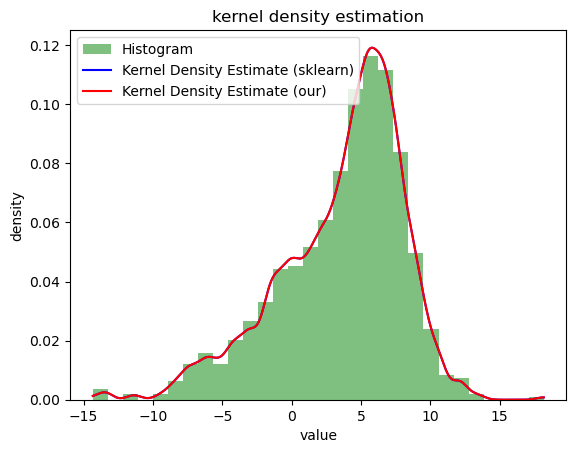

In [37]:
#plot the original data and the KDE estimate
plt.hist(Data, bins=30 ,density=True,alpha=0.5,color='green',label='Histogram')
plt.plot(x_vals,densities_sklearn,color='blue',label='Kernel Density Estimate (sklearn)')
plt.plot(x_vals,densities_our,color='red',label='Kernel Density Estimate (our)')
plt.legend()
plt.title('kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.show()